In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subgroups.utils.plotting import plot_scatter, plot_corr, plot_2D_embedding, plot_cat_continuous, plot_cat_proportions, spectral_no_yellow
from subgroups.datasets.registry import RosmapSingleCellDataset
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import SpectralClustering
from subgroups.utils.plotting import get_corr
from subgroups.utils.plotting import plot_2D_embedding
from subgroups.counterfactuals.counterfactuals import CounterfactualEvaluation

from subgroups.datasamplers.feature_selectors import SelectPCsSingleCell
from sklearn.manifold import SpectralEmbedding
from subgroups.models.classifier import XgbFactory
from sklearn.metrics import roc_auc_score
from subgroups.utils.random import fork_rng
from scipy.stats import chi2_contingency
import pandas as pd

data = RosmapSingleCellDataset(
        path_to_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/normalized_batch_corrected_all_celltypes.npy',
        path_to_meta_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/meta.npy',
        path_to_extended_meta_data = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/dataset_1282_06-16-2023_long_and_basic_merged_427patients_DianePathAnno_Sorted_DC_2024_06_16.csv',
        path_to_projid_dictionary = '/Users/djuna/Documents/subgroups_data/rosmap_mathys400/variable_encodings/projid_dictionary.npy'
    )

# --- colormap ---
cmap = spectral_no_yellow()
pal8 = cmap(np.linspace(0, 1, 8))
purple2, green2, blue2 = pal8[0], pal8[3], pal8[6]
cols = [purple2, green2, blue2]

Plotting SNR-results

In [3]:
path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30/snr_outputs/combined_snr_outputs.npy'
snr_data = np.load(path)

In [17]:
index = np.where((snr_data['snr_']>5) & (snr_data['snr_']<10))[0]
point3 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
point3

np.void((5.0, 0.6969444155693054, 5.122597792311005, 0.3190159948034689, 7), dtype=[('n_pcs_', '<f8'), ('test_accuracy_', '<f8'), ('snr_', '<f8'), ('alpha_', '<f8'), ('max_depth_', '<i8')])

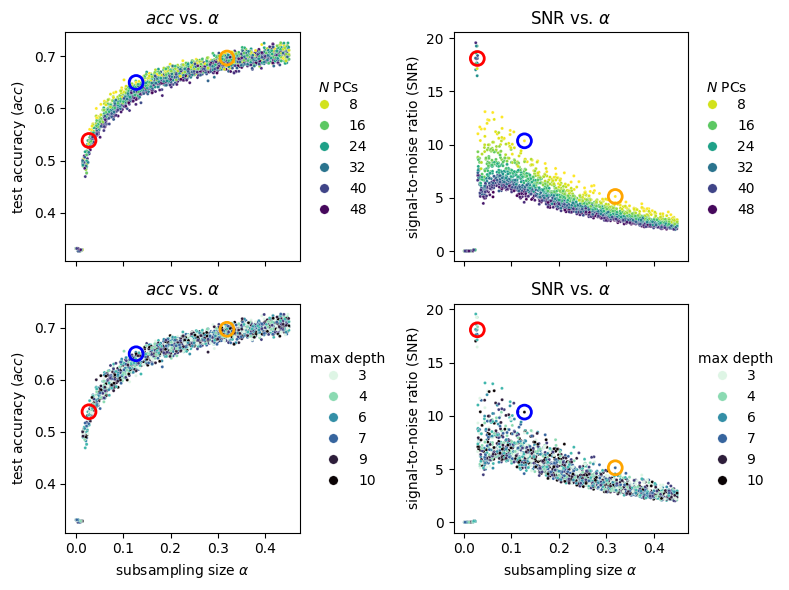

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
index = np.where(snr_data['snr_']>15)[0]
point1 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
index = np.where((snr_data['snr_']>10) & (snr_data['snr_']<15))[0]
point2 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]
index = np.where((snr_data['snr_']>5) & (snr_data['snr_']<10))[0]
point3 = snr_data[index[snr_data[index]['test_accuracy_'].argmax()]]

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['test_accuracy_'], 
    hue=snr_data['n_pcs_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='test accuracy ($acc$)', 
    title='$acc$ vs. $\\alpha$',
    legend_title='$N$ PCs',
    ax=axes[0,0],
    highlight_point=(point1['alpha_'], point1['test_accuracy_']),
    highlight_point1=(point2['alpha_'], point2['test_accuracy_']),
    highlight_point2=(point3['alpha_'], point3['test_accuracy_'])
)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['snr_'], 
    hue=snr_data['n_pcs_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='SNR vs. $\\alpha$',
    legend_title='$N$ PCs',
    ax=axes[0,1],
    highlight_point=(point1['alpha_'], point1['snr_']),
    highlight_point1=(point2['alpha_'], point2['snr_']),
    highlight_point2=(point3['alpha_'], point3['snr_'])

)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['test_accuracy_'], 
    hue=snr_data['max_depth_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='test accuracy ($acc$)', 
    title='$acc$ vs. $\\alpha$',
    legend_title='max depth',
    ax=axes[1,0],
    cmap='mako_r',
    highlight_point=(point1['alpha_'], point1['test_accuracy_']),
    highlight_point1=(point2['alpha_'], point2['test_accuracy_']),
    highlight_point2=(point3['alpha_'], point3['test_accuracy_'])
)

plot_scatter(
    x=snr_data['alpha_'], 
    y=snr_data['snr_'], 
    hue=snr_data['max_depth_'], 
    xlabel='subsampling size $\\alpha$', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='SNR vs. $\\alpha$',
    legend_title='max depth',
    ax=axes[1,1],
    cmap='mako_r',
    highlight_point=(point1['alpha_'], point1['snr_']),
    highlight_point1=(point2['alpha_'], point2['snr_']),
    highlight_point2=(point3['alpha_'], point3['snr_'])
)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/snr_rosmap_singlecell_experiment_june_30.png', dpi=300)


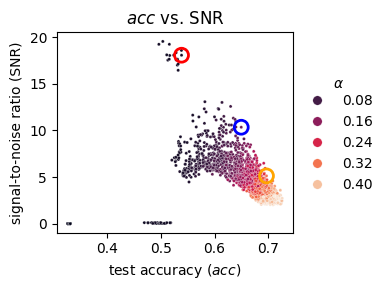

In [20]:
plot_scatter(
    x=snr_data['test_accuracy_'], 
    y=snr_data['snr_'], 
    hue=snr_data['alpha_'], 
    xlabel='test accuracy ($acc$)', 
    ylabel='signal-to-noise ratio (SNR)', 
    title='$acc$ vs. SNR',
    legend_title='$\\alpha$',
    cmap='rocket',
    highlight_point=(point1['test_accuracy_'], point1['snr_']),
    highlight_point1=(point2['test_accuracy_'], point2['snr_']),
    highlight_point2=(point3['test_accuracy_'], point3['snr_'])
)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/acc_vs_snr_rosmap_singlecell_experiment_june_30.png', dpi=300)


Load datamodels results

In [2]:
# get indices
index_grp_1 = (data.coarse_labels)
index_grp_2 = np.invert(index_grp_1)

# get point 1 results
point_1_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30_point_1'
point_1_results = {
    'weights': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_1_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}

# get point 2 results
point_2_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30'
point_2_results = {
    'weights': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_2_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}

# get point 3 results
point_3_path = '/Users/djuna/Documents/temp/results/rosmap_singlecell_experiment_june_30_point_3'
point_3_results = {
    'weights': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_weights.npy')),
    'pearson_corr': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_pearson_correlations.npy')),
    'spearman_corr': np.load(os.path.join(point_3_path, 'datamodel_outputs', 'batch_0_spearman_correlations.npy'))
}




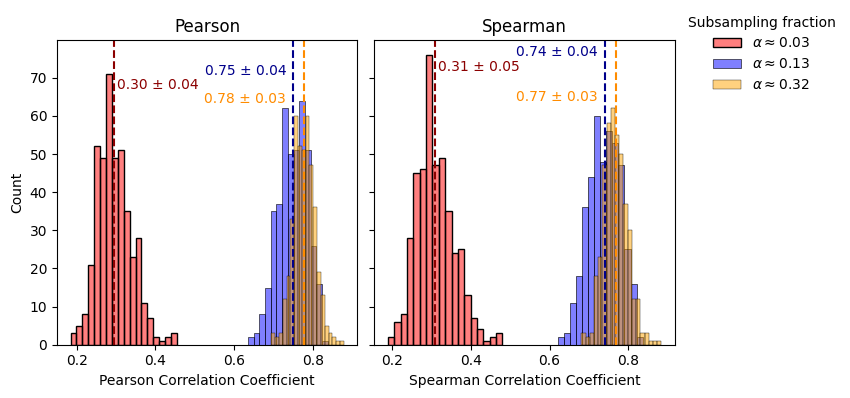

In [ ]:

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# --- Pearson plot ---
ax = axes[0]
mean1 = np.mean(point_1_results['pearson_corr'])
std1 = np.std(point_1_results['pearson_corr'])
sns.histplot(point_1_results['pearson_corr'], color='red', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.03$')
ax.axvline(x=mean1, color='darkred', linestyle='--')
ax.text(mean1 + 0.11, ax.get_ylim()[1] * 0.9, f'{mean1:.2f} ± {std1:.2f}', color='darkred', ha='center')

mean2 = np.mean(point_2_results['pearson_corr'])
std2 = np.std(point_2_results['pearson_corr'])
sns.histplot(point_2_results['pearson_corr'], color='blue', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.13$')
ax.axvline(x=mean2, color='darkblue', linestyle='--')
ax.text(mean2 - 0.12, ax.get_ylim()[1] * 0.95, f'{mean2:.2f} ± {std2:.2f}', color='darkblue', ha='center')

mean3 = np.mean(point_3_results['pearson_corr'])
std3 = np.std(point_3_results['pearson_corr'])
sns.histplot(point_3_results['pearson_corr'], color='orange', alpha=0.5, ax=ax, label=r'$\alpha \approx 0.32$')
ax.axvline(x=mean3, color='darkorange', linestyle='--')
ax.text(mean3 - 0.15, ax.get_ylim()[1] * 0.85, f'{mean3:.2f} ± {std3:.2f}', color='darkorange', ha='center')

ax.set_xlabel('Pearson Correlation Coefficient')
ax.set_title('Pearson')

# --- Spearman plot ---
ax2 = axes[1]
mean1_s = np.mean(point_1_results['spearman_corr'])
std1_s = np.std(point_1_results['spearman_corr'])
sns.histplot(point_1_results['spearman_corr'], color='red', alpha=0.5, ax=ax2)
ax2.axvline(x=mean1_s, color='darkred', linestyle='--')
ax2.text(mean1_s + 0.11, ax2.get_ylim()[1] * 0.9, f'{mean1_s:.2f} ± {std1_s:.2f}', color='darkred', ha='center')

mean2_s = np.mean(point_2_results['spearman_corr'])
std2_s = np.std(point_2_results['spearman_corr'])
sns.histplot(point_2_results['spearman_corr'], color='blue', alpha=0.5, ax=ax2)
ax2.axvline(x=mean2_s, color='darkblue', linestyle='--')
ax2.text(mean2_s - 0.12, ax2.get_ylim()[1] * 0.95, f'{mean2_s:.2f} ± {std2_s:.2f}', color='darkblue', ha='center')

mean3_s = np.mean(point_3_results['spearman_corr'])
std3_s = np.std(point_3_results['spearman_corr'])
sns.histplot(point_3_results['spearman_corr'], color='orange', alpha=0.5, ax=ax2)
ax2.axvline(x=mean3_s, color='darkorange', linestyle='--')
ax2.text(mean3_s - 0.15, ax2.get_ylim()[1] * 0.8, f'{mean3_s:.2f} ± {std3_s:.2f}', color='darkorange', ha='center')

ax2.set_xlabel('Spearman Correlation Coefficient')
ax2.set_title('Spearman')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Subsampling fraction', bbox_to_anchor=(0.85, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/corr_by_subsampling_fraction.png', dpi=300)
plt.show()


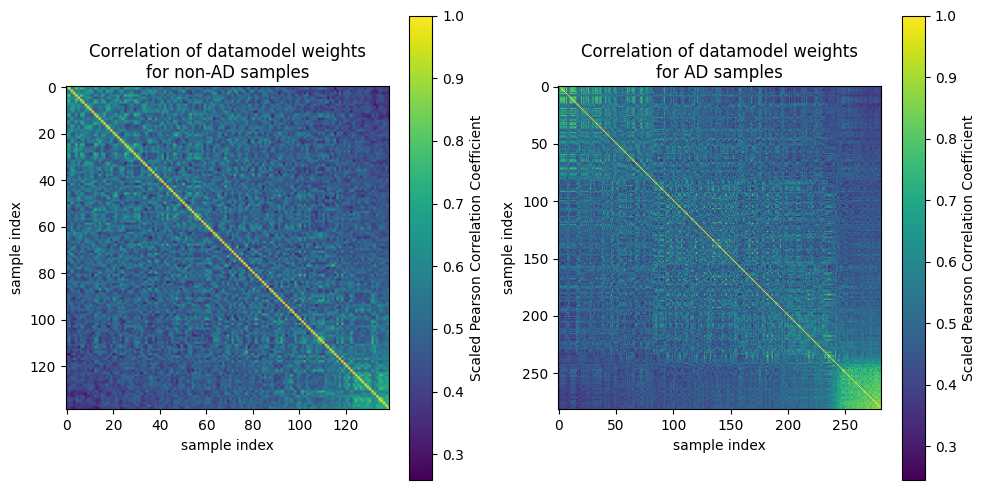

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_corr(point_3_results['weights'], index_grp_1, 'Correlation of datamodel weights\nfor AD samples', ax=axes[1], fig=fig)
plot_corr(point_3_results['weights'], index_grp_2, 'Correlation of datamodel weights\nfor non-AD samples', ax=axes[0], fig=fig)
plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_subset_corr.png', dpi=300)



show pathology-related

In [16]:
np.unique(diagnosis,return_counts=True)[0], np.unique(diagnosis,return_counts=True)[1]

(array(['AD + DLB', 'AD only', 'DLB only', 'Dementia due to other cause',
        'MCI due to other cause', 'No AD, No DLB',
        'Questionable - last cog test many years before death'],
       dtype='<U52'),
 array([ 38, 203,  13,  20,   3, 139,   5]))

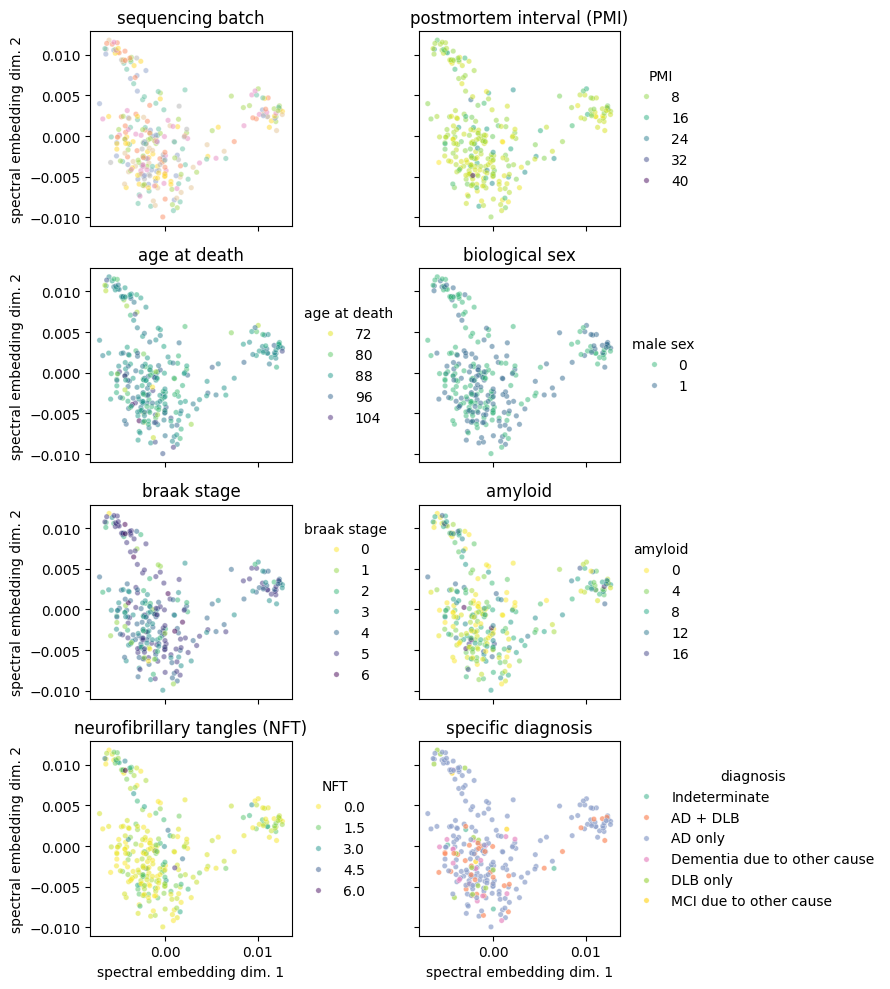

In [20]:
import pandas as pd
meta = pd.read_csv('../results/Fastq_paths_432_PFC_HM_updated_edited.csv')
dictionary = dict(zip(meta['projid'], meta['Batch']))
seq_batch = np.array([dictionary[x] for x in data.descriptive_data['projid']])

dictionary = {0: 'No AD, No DLB', 1: 'AD only', 2: 'DLB only', 3: 'AD + DLB', 4: 'MCI due to other cause', 5: 'Dementia due to other cause', 6: 'Indeterminate'}
diagnosis = np.array([dictionary[x] for x in data.descriptive_data['AD_DLB_diagnosis']])

fig, axes = plt.subplots(4, 2, figsize=(9, 10), sharey=True, sharex=True)
weights = point_3_results['weights']

plot_2D_embedding(weights, index_grp_1, seq_batch[(index_grp_1)], 'sequencing batch', 'seq_batch', ax=axes[0,0], cmap = 'Set2', s=15, show_legend=False, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['pmi'][(index_grp_1)], 'postmortem interval (PMI)', 'PMI', ax=axes[0,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['age_death'][(index_grp_1)], 'age at death', 'age at death', ax=axes[1,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['msex'][(index_grp_1)], 'biological sex', 'male sex', ax=axes[1,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['braaksc'][(index_grp_1)], 'braak stage', 'braak stage', ax=axes[2,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['amyloid'][(index_grp_1)], 'amyloid', 'amyloid', ax=axes[2,1], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, data.descriptive_data['nft'][(index_grp_1)], 'neurofibrillary tangles (NFT)', 'NFT', ax=axes[3,0], s=15, alpha=0.5)
plot_2D_embedding(weights, index_grp_1, diagnosis[(index_grp_1)], 'specific diagnosis', 'diagnosis', cmap = 'Set2', ax=axes[3,1], s=15, alpha=0.7)

# have to plot seq batch as well
plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_embeddings.png', dpi=300)


Counterfactual experiment

In [37]:
# --- Spectral clustering ---
weights = point_3_results['weights']

corr = get_corr(weights, index_grp_1)
spectral = SpectralClustering(
    n_clusters=3,           # number of clusters you expect
    affinity='precomputed',  # or 'rbf'
    assign_labels='kmeans', # how to assign labels after embedding
    random_state=0
)
# get partitions
partitions = spectral.fit_predict(corr)

# --- Counterfactual analysis ---
pc_indices = SelectPCsSingleCell().feature_indices(n_pcs=5)
counterfactual_estimator = CounterfactualEvaluation(features=data.features[:,pc_indices],
                                                        coarse_labels=data.coarse_labels,
                                                        train_size=17,
                                                        test_size=26,
                                                        classifier=XgbFactory(max_depth=7))

In [38]:
n_iter = 1000

In [8]:
# --- Counterfactual analysis: cluster 0 ---
children = fork_rng(np.random.default_rng(0), 2)
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 0
res_clust_0 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis: cluster 1 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 1
res_clust_1 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis: cluster 2 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions == 2
res_clust_2 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# group all results
res_clust_1['cluster'] = 1
res_clust_2['cluster'] = 2
res_clust_0['cluster'] = 0
res = pd.concat([res_clust_1, res_clust_2, res_clust_0])
res['type'] = 'datamodels'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.features)
pca = PCA(n_components=np.sum(data.coarse_labels))  # adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

def get_corr_pca(weights, index):
    corr = np.corrcoef(weights[(index)])
    corr = (corr+1)/2
    return corr

corr = get_corr_pca(X_pca, index_grp_1)
spectral = SpectralClustering(
    n_clusters=3,           # number of clusters you expect
    affinity='precomputed',  # or 'rbf'
    assign_labels='kmeans', # how to assign labels after embedding
    random_state=0
)
# get partitions
partitions_pca = spectral.fit_predict(corr)

# --- Counterfactual analysis PCA: cluster 0 ---
children = fork_rng(np.random.default_rng(0), 2)
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 0
pca_res_clust_0 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis PCA: cluster 1 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 1
pca_res_clust_1 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# --- Counterfactual analysis PCA: cluster 2 ---
partition = np.zeros_like(data.coarse_labels)
partition[index_grp_1] = partitions_pca == 2
pca_res_clust_2 = counterfactual_estimator.counterfactual_evaluation(partition, model_rng=children[0], shuffle_rng=children[1], n_iter=n_iter)

# group all results
pca_res_clust_1['cluster'] = 1
pca_res_clust_2['cluster'] = 2
pca_res_clust_0['cluster'] = 0
pca_res = pd.concat([pca_res_clust_1, pca_res_clust_2, pca_res_clust_0])
pca_res['type'] = 'PCA'

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
from tqdm import tqdm
#set_config(display='text')

n_iter = 1000
all_aucs = []

for i in tqdm(range(n_iter)):
    children = fork_rng(np.random.default_rng(i), 3)

    X_tr, X_te, y_tr, y_te = train_test_split(
        data.features, data.coarse_labels,
        test_size=0.7,
        stratify=data.coarse_labels,        # <-- ensures y’s class distribution is preserved
        shuffle=True,
        random_state=np.random.RandomState(children[0].bit_generator)
    )

    rus = RandomUnderSampler(random_state=np.random.RandomState(children[1].bit_generator))
    X_tr_bal, y_tr_bal = rus.fit_resample(X_tr, y_tr)

    model = XgbFactory(max_depth=7).build_model(rng=np.random.default_rng(children[2]))
    model.fit(X_tr_bal, y_tr_bal)
    pred = model.predict_proba(X_te)
    auc = roc_auc_score(y_te, pred[:,1])
    all_aucs.append(auc)

res_baseline = pd.DataFrame(np.hstack(all_aucs), columns = ['mean_auc'])
res_baseline['type'] = 'baseline'
res_baseline['seed'] = np.arange(len(res_baseline))
res_baseline['prob_type'] = 'not applicable'

100%|██████████| 1000/1000 [02:46<00:00,  5.99it/s]


In [30]:
def av_results(res):
    avg_auc = (
        res
        .groupby(['seed', 'prob_type', 'cluster', 'type'], as_index=False)['auc']
        .mean()
        .rename(columns={'auc': 'mean_auc'})
    )
    avg_auc = (
        avg_auc
        .groupby(['seed', 'prob_type', 'type'], as_index=False)['mean_auc']
        .mean()
    )
    return avg_auc

avg_auc = av_results(res)
avg_auc_pca = av_results(pca_res)
all_res = pd.concat([avg_auc, avg_auc_pca])

all_res = pd.concat([all_res, res_baseline])

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

baseline vs. pca: Wilcoxon test (paired samples), P_val:3.885e-141 Stat=1.919e+04
pca vs. datamodels: Wilcoxon test (paired samples), P_val:3.621e-153 Stat=9.268e+03
baseline vs. datamodels: Wilcoxon test (paired samples), P_val:3.661e-165 Stat=3.200e+01
baseline vs. pca: Wilcoxon test (paired samples), P_val:9.280e-165 Stat=3.420e+02
pca vs. datamodels: Wilcoxon test (paired samples), P_val:4.695e-103 Stat=5.333e+04
baseline vs. datamodels: Wilcoxon test (paired samples), P_val:3.366e-165 Stat=4.000e+00
pca vs. datamodels: Wilcoxon test (paired samples), P_val:2.748e-158 Stat=5.362e+03


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_14327/3073776802.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


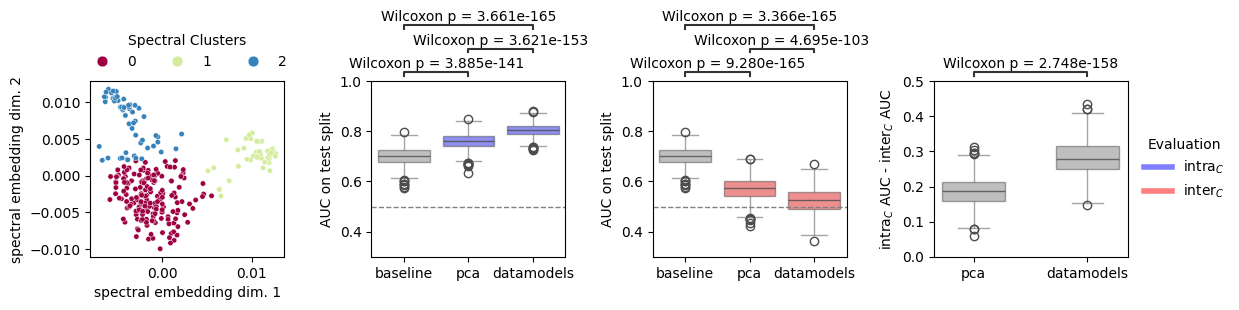

In [192]:
# plot partitions
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3.5), sharey=False, sharex=False)
plot_2D_embedding(weights, index_grp_1, partitions, '', 'clusters', cmap = [purple2, green2, blue2], s=15, alpha=1, ax=axes[0])

plot_cat_continuous(
        data=all_res[all_res['prob_type']!='probabilities_outside_split'],
        cat_col='type',
        cont_col='mean_auc',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'blue', 'blue'],
        ax=axes[1],
        y_lower=0.3,
        y_upper=1,
        loc='outside',
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        order = ['baseline', 'pca', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

plot_cat_continuous(
        data=all_res[all_res['prob_type']!='probabilities_on_split'],
        cat_col='type',
        cont_col='mean_auc',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'red', 'red'],
        ax=axes[2],
        y_lower=0.3,
        y_upper=1,
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        order = ['baseline', 'pca', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

# plot diffs in AUC

out = []

for i in ['datamodels', 'pca']:
    temp = all_res[all_res['type']==i]

    df_pivot = temp.pivot(index='seed', 
                        columns='prob_type', 
                        values='mean_auc')

    # compute on – out
    df_pivot['on_minus_out'] = (
        df_pivot['probabilities_on_split']
        - df_pivot['probabilities_outside_split']
    )

    result = df_pivot[['on_minus_out']].reset_index()
    result['type'] = i
    out.append(result)

out = pd.concat(out)

plot_cat_continuous(
        data=out,
        cat_col='type',
        cont_col='on_minus_out',
        test='Mann-Whitney',
        text_format='full',
        palette=['grey', 'grey'],
        ax=axes[3],
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.55
        },
        y_lower=0,
        y_upper=0.5,
        order = ['pca', 'datamodels'],
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )

for ax in axes[1:]:
    ax.set_xlabel('')
    ax.set_ylabel('')

axes[1].set_ylabel('AUC')

line1, = axes[-1].plot(0, 0, lw=4, color='blue', alpha=0.5)
line2, = axes[-1].plot(0, 0, lw=4, color='red', alpha=0.5)

# now add a manual legend to just that last subplot:
axes[-1].legend(
    [line1, line2],               # the “handles”
    [r'intra$_C$', r'inter$_C$'],       # the “labels”
    loc='center left',           # anchor the legend’s center‐left
    bbox_to_anchor=(1.02, 0.5),         # position
    title='Evaluation',           # optional title
    frameon=False,                 # draw a box around it
    fontsize='medium'              # adjust text size
)

axes[1].set_ylabel('AUC on test split')
axes[2].set_ylabel('AUC on test split')
axes[3].set_ylabel(r'intra$_C$ AUC - inter$_C$ AUC')

axes[0].legend(
       # the “labels”
    title='Spectral Clusters',
    ncol=3,
    loc='lower center', 
    markerscale=2,
    frameon=False,
    bbox_to_anchor=(0.5, 1)          # adjust text size
)

axes[1].axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
axes[2].axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_aucs.png', dpi=300)


Plot cont metadata by split

In [4]:
meta = pd.DataFrame(data.descriptive_data[index_grp_1])
meta['label'] = partitions

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.803e-01 U_stat=3.764e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.159e-01 U_stat=1.100e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.191e-02 U_stat=4.451e+03


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.052e-01 U_stat=3.746e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.429e-01 U_stat=1.315e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.824e-01 U_stat=5.437e+03
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.667e-02 U_stat=3.132e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.355e-01 U_stat=1.361e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.280e-01 U_stat=4.801e+03


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_20422/1732092685.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.642e-01 U_stat=3.464e+03
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.031e-01 U_stat=1.149e+03
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.568e-02 U_stat=4.461e+03


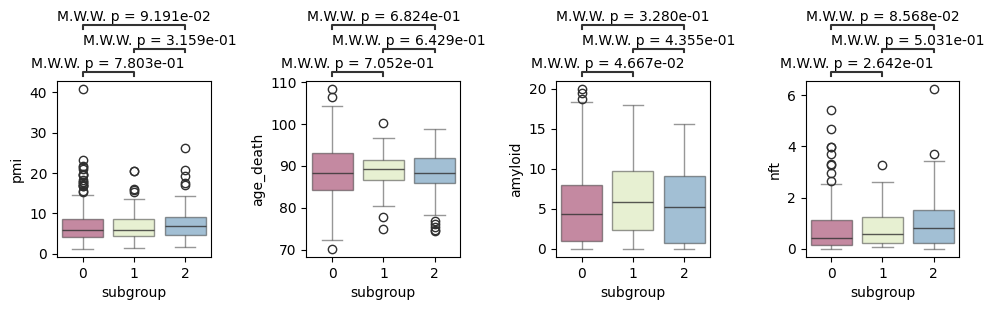

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

variables = ['pmi', 'age_death','amyloid', 'nft']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_continuous(
        data=meta,
        cat_col='label',
        cont_col=var,
        test='Mann-Whitney',
        text_format='full',
        palette=cols,
        ax=ax,
        boxplot_kwargs={
            'boxprops':     {'alpha': 0.5},
            'whiskerprops': {'alpha': 0.5},
            'capprops':     {'alpha': 0.5},
            'medianprops':  {'alpha': 0.8},
            'width': 0.8
        },
        stripplot_kwargs={'alpha': 0.6, 'size': 0}
    )
    ax.set_xlabel('subgroup')
    #ax.set_title(var)

plt.tight_layout()
#plt.show()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_cont_meta.png', dpi=300)



Plot cat metadata by split

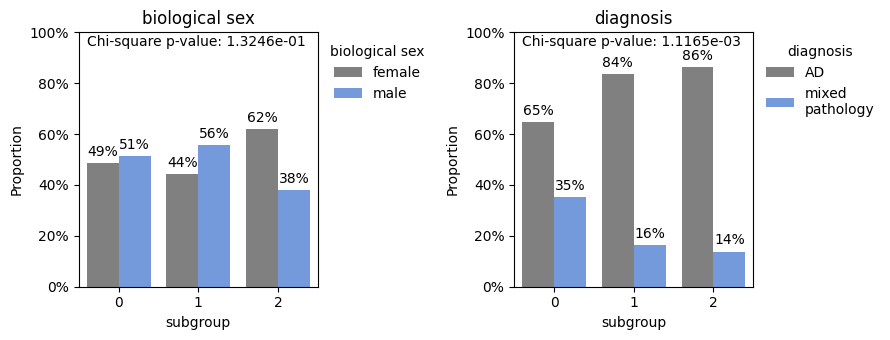

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

meta['diagnosis'] = ['AD' if x==1 else 'mixed\npathology' for x in meta['AD_DLB_diagnosis']]
meta['biological sex'] = ['male' if x==1 else 'female' for x in meta['msex']]
variables = ['biological sex', 'diagnosis']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_proportions(
        data=meta,
        cat_col='label',
        hue_col=var,
        palette=['grey', 'cornflowerblue'],
        ax=ax
    )
    ax.set_xlabel('subgroup')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=var)
    # Annotation with test results
    table = pd.crosstab(meta['label'], meta[var])

    chi2, p, dof, expected = chi2_contingency(table)
    textstr = (
       # f"Chi-square statistic: {chi2:.4f}\n"
        f"Chi-square p-value: {p:.4e}"
    )
    #props = dict(boxstyle='round',facecolor='white', alpha=0.5)
    ax.text(0.95, 0.99, textstr, transform=ax.transAxes,
            ha='right', va='top')


    ax.set_title(var)
plt.tight_layout()
plt.show()


Examine genetic differences

In [65]:
meta['APOE'] = ['E4' if x in set([34, 24, 44]) else 'E3' for x in meta['apoe_genotype']]

# --- rs3752246 ---
geno = pd.read_csv('../../subgroups_data/rosmap_wgs/HIGHandMED_coding_annotations_syn11724057_subset.csv')
mapping = pd.read_csv('../../subgroups_data/rosmap_wgs/WGS_sample_QC_info.csv')
dictionary = dict(zip(mapping['projid'], mapping['WGS_id']))
meta['WGS_id'] = meta['projid'].map(dictionary)
rs = geno[geno['ID']=='rs3752246'].T
dictionary = dict(zip(rs.index, rs[137798]))
meta['rs3752246'] = meta['WGS_id'].map(dictionary)
meta['ABCA7'] = ['p.1527Gly' if x!='1/1' else 'p.1527Ala' for x in meta['rs3752246']]

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_18047/4018720290.py:4: DtypeWarning: Columns (6,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  geno = pd.read_csv('../../subgroups_data/rosmap_wgs/HIGHandMED_coding_annotations_syn11724057_subset.csv')


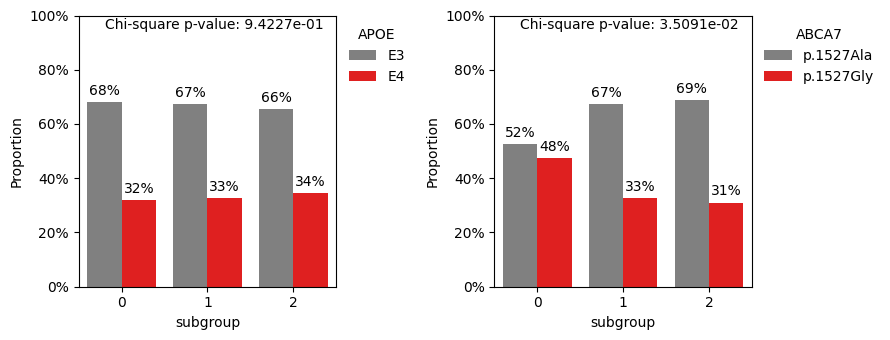

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5), sharey=False, sharex=True)

# flatten into a 1-D array of length 8
axes_flat = axes.flatten()

variables = ['APOE', 'ABCA7']

# only take the first 5 axes (or whatever subset you need)
for ax, var in zip(axes_flat[:len(variables)], variables):
    plot_cat_proportions(
        data=meta,
        cat_col='label',
        hue_col=var,
        palette=['grey', 'red'],
        ax=ax
    )
    ax.set_xlabel('subgroup')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=var)
    # Annotation with test results
    table = pd.crosstab(meta['label'], meta[var])

    chi2, p, dof, expected = chi2_contingency(table)
    textstr = (
       # f"Chi-square statistic: {chi2:.4f}\n"
        f"Chi-square p-value: {p:.4e}"
    )
    #props = dict(boxstyle='round',facecolor='white', alpha=0.5)
    ax.text(0.95, 0.99, textstr, transform=ax.transAxes,
            ha='right', va='top')
    
    ax.set_title(var)

plt.tight_layout()
#plt.show()
plt.savefig('/Users/djuna/Documents/Maydell-MIT-PhD-Thesis/MIT-thesis-template/ch4_figs/rosmap_genetic_differences.png', dpi=300)
